In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import scale

In [7]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\4)Clustering\Assignment Given\EastWestAirlines.csv"

In [8]:
path=path.replace("\\", "/")

In [9]:
df=pd.read_csv(path)

In [11]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
df=pd.get_dummies(data=df,columns={"cc1_miles","cc2_miles","cc3_miles"},drop_first=True)

In [13]:
df_new=scale(df.iloc[:,1:])

In [16]:
df_new=pd.DataFrame(df_new)

In [17]:
#Lets create elbow or screew plot

k=list(range(2,17))
k
TWSS=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(df_new)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_new.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_new.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x1be7ed13c08>,
 <a list of 15 Text major ticklabel objects>)

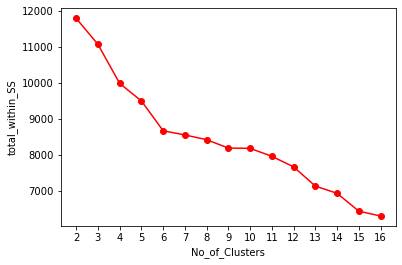

In [19]:
#Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [ ]:
model=KMeans(n_clusters=5).fit(df_new)
model.labels_
df["Clust"]=pd.Series(model.labels_)
df=df.iloc[:,[19,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

In [20]:
df.head()

,Clust,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5,cc2_miles_2,cc2_miles_3,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5
0,0,28143,0,174,1,0,0,7000,0,0,0,0,0,0,0,0,0,0,0
1,0,19244,0,215,2,0,0,6968,0,0,0,0,0,0,0,0,0,0,0
2,0,41354,0,4123,4,0,0,7034,0,0,0,0,0,0,0,0,0,0,0
3,0,14776,0,500,1,0,0,6952,0,0,0,0,0,0,0,0,0,0,0
4,1,97752,0,43300,26,2077,4,6935,1,0,0,0,0,0,0,0,0,1,0
